In [75]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [76]:
# Import the dataset
file_path = 'Real estate valuation data set.xlsx'
raw_df = pd.read_excel(file_path)

raw_df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [77]:
#shape of data
raw_df.shape

(414, 8)

In [78]:
#Basic info
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


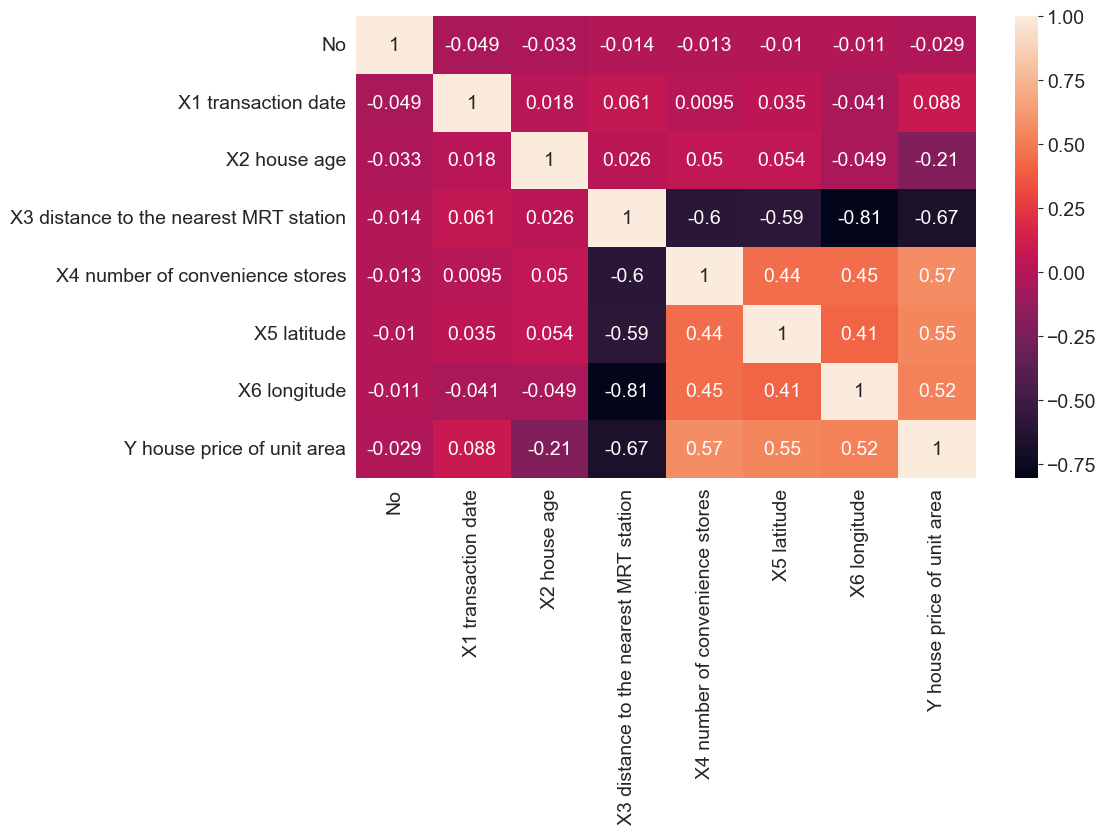

In [79]:
sns.heatmap(raw_df.corr(),annot=True);

According to this we don't need 'No' and 'Transaction Date' column so let's drop it.

In [80]:
raw_df['X1 transaction date'].value_counts()

2013.416667    58
2013.500000    47
2013.083333    46
2012.916667    38
2013.250000    32
2012.833333    31
2012.666667    30
2013.333333    29
2013.000000    28
2012.750000    27
2013.166667    25
2013.583333    23
Name: X1 transaction date, dtype: int64

In [81]:
df = raw_df.copy()
df.drop(columns=['X1 transaction date', 'No'],axis=1,inplace=True)

In [82]:
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [83]:
## Train test split
from sklearn.model_selection import train_test_split

In [84]:
X = df.drop('Y house price of unit area',axis=1)
y = df['Y house price of unit area']

In [85]:
X.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [86]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [88]:
print('X_train : ',X_train.shape)
print('X_test : ',X_test.shape)
print('y_train : ',y_train.shape)
print('y_test : ',y_test.shape)

X_train :  (331, 5)
X_test :  (83, 5)
y_train :  (331,)
y_test :  (83,)


In [89]:
## Scaling
from sklearn.preprocessing import StandardScaler

In [90]:
df.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [91]:
scaler = StandardScaler()

In [92]:
df.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [93]:
selected_cols = df[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]

In [94]:
selected_cols.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [95]:
scaler.fit(selected_cols)

StandardScaler()

In [96]:
X_train = scaler.transform(X_train)

In [97]:
X_train = pd.DataFrame(X_train,columns=['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'])

In [98]:
X_train.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2.292652,-0.814143,0.987694,-0.123441,0.478119
1,-0.853573,0.898572,-0.032020,-0.722866,-1.288509
2,-0.932668,0.865586,-0.371925,-0.482451,-1.358313
3,1.659892,-0.472056,1.327598,0.090352,0.755378
4,-0.897514,-0.352429,0.307885,0.286395,0.964137


In [99]:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'])

In [100]:
X_test.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,-1.459968,-0.706261,0.647789,-0.267851,0.491167
1,-0.396579,-0.469349,0.307885,-0.313030,0.261531
2,-1.556639,-0.642457,-1.051734,0.465497,-0.180778
3,-0.440521,-0.724868,-1.051734,0.377560,-0.229706
4,0.218605,0.873597,-0.371925,-0.468736,-1.369403


In [101]:
# model selection -- Random forest
from sklearn.ensemble import RandomForestRegressor

In [102]:
for i in range(10,250,10):
    model = RandomForestRegressor(n_estimators=i)
    model.fit(X_train,y_train)
    print('n_estimator',i)
    print('model_score',model.score(X_test,y_test))
    print()

n_estimator 10
model_score 0.7736535008509592

n_estimator 20
model_score 0.7976416669569557

n_estimator 30
model_score 0.7903260819300659

n_estimator 40
model_score 0.7952540988227514

n_estimator 50
model_score 0.795392860187039

n_estimator 60
model_score 0.8018754970942826

n_estimator 70
model_score 0.7994318039959422

n_estimator 80
model_score 0.8012015408295791

n_estimator 90
model_score 0.79868007364133

n_estimator 100
model_score 0.8091190875115488

n_estimator 110
model_score 0.80209888962452

n_estimator 120
model_score 0.8072791825751633

n_estimator 130
model_score 0.8028202970270159

n_estimator 140
model_score 0.7981964887601103

n_estimator 150
model_score 0.8032426289139378

n_estimator 160
model_score 0.7997115404200551

n_estimator 170
model_score 0.798142093477701

n_estimator 180
model_score 0.7991354757526004

n_estimator 190
model_score 0.7980131134949082

n_estimator 200
model_score 0.8024694766941066

n_estimator 210
model_score 0.800766836921473

n_estima

In [103]:
model = RandomForestRegressor(n_estimators=60)

In [104]:
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=60)

In [105]:
model.score(X_test,y_test)

0.7956555295838628

In [106]:
from sklearn.metrics import mean_squared_error

In [107]:
pred = model.predict(X_train)

In [108]:
mean_squared_error(y_train,pred)

9.298788816583537

In [109]:
mse = 11.39603849263209
rmse = np.sqrt(mse)
print(rmse)

3.3758019036418725


In [110]:
min_value = df['Y house price of unit area'].min()
max_value = df['Y house price of unit area'].max()

print(f"The range of the target variable is from {min_value} to {max_value}")

The range of the target variable is from 7.6 to 117.5


Given that the range of your target variable is from 7.6 to 117.5, an RMSE of 3.3758019036418725 seems to be a good result.

This is because the RMSE value is small compared to the range of your target variable. It means that on average, your model's predictions are about 3.38 units away from the actual values, which is relatively small considering your target variable can vary from 7.6 to 117.5.

However, remember that the interpretation of RMSE is problem-specific and it's always a good idea to compare it with other models' performance on the same problem, if possible. Also, consider other evaluation metrics and visualizations to get a comprehensive understanding of your model's performance.

In [111]:
import joblib

real_estate = {
    'model': model,
    'scaler': scaler
}
joblib.dump(real_estate, 'real_estate.joblib')

['real_estate.joblib']